# PySpark - 50min - Crash Course
- Youtube Video - https://www.youtube.com/watch?v=6rgoqfzX_YI
- Github Repo - https://github.com/Jcharis/DataScienceTools/tree/master/PySpark-Crash-Course
- PySpark Docs - https://spark.apache.org/docs/latest/api/python/index.html

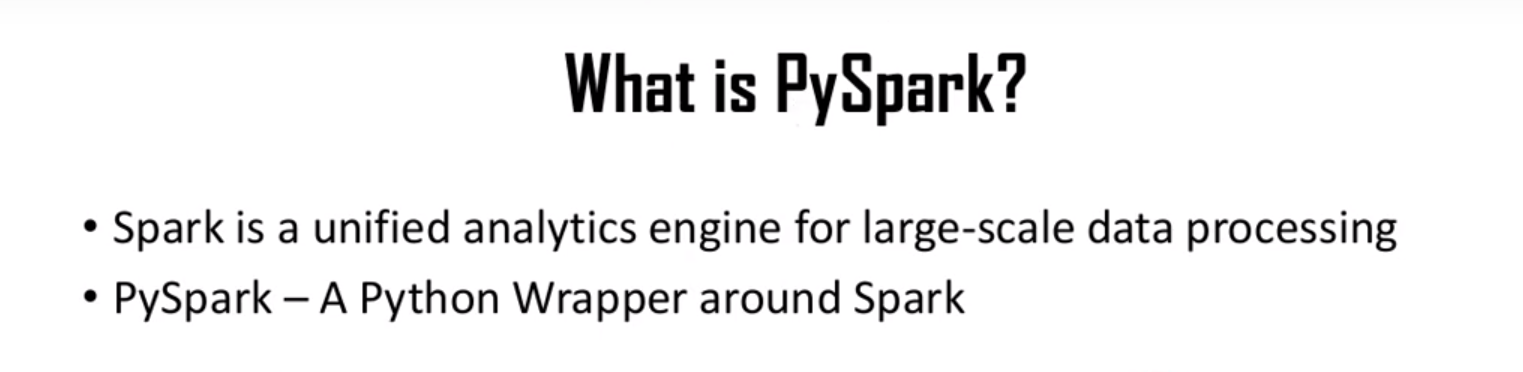

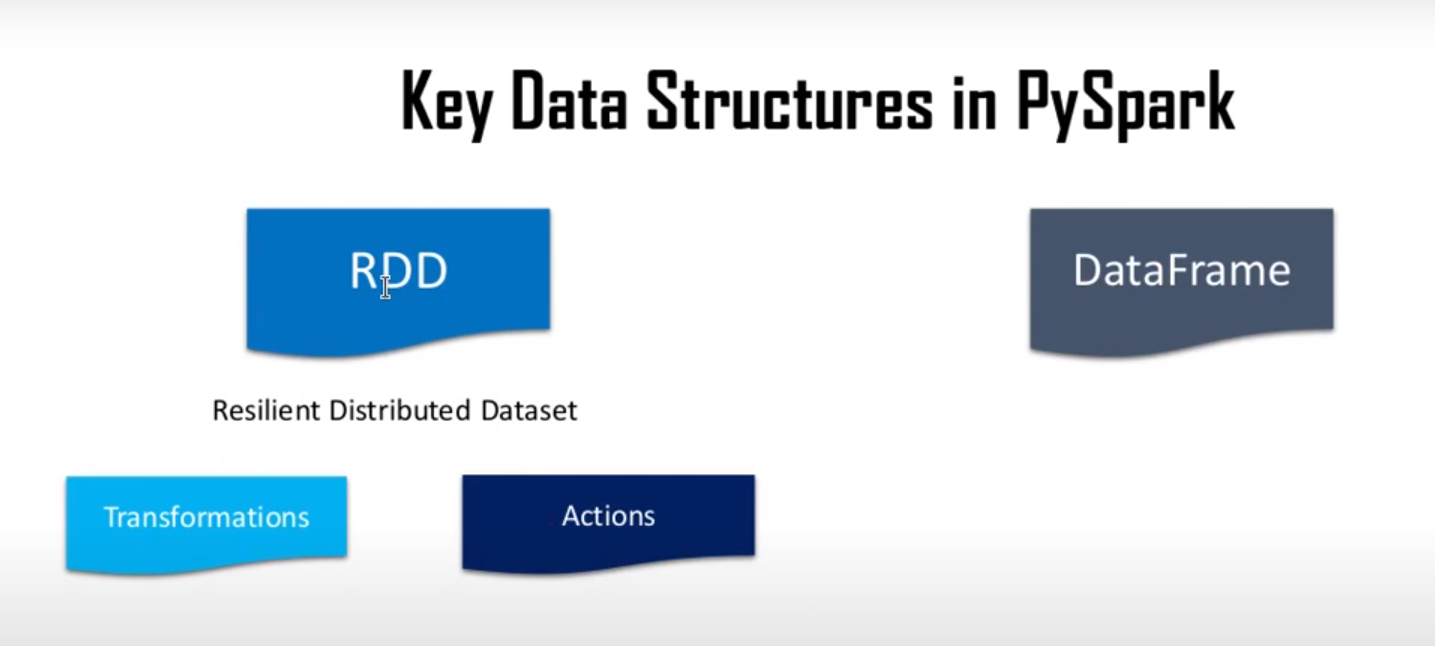
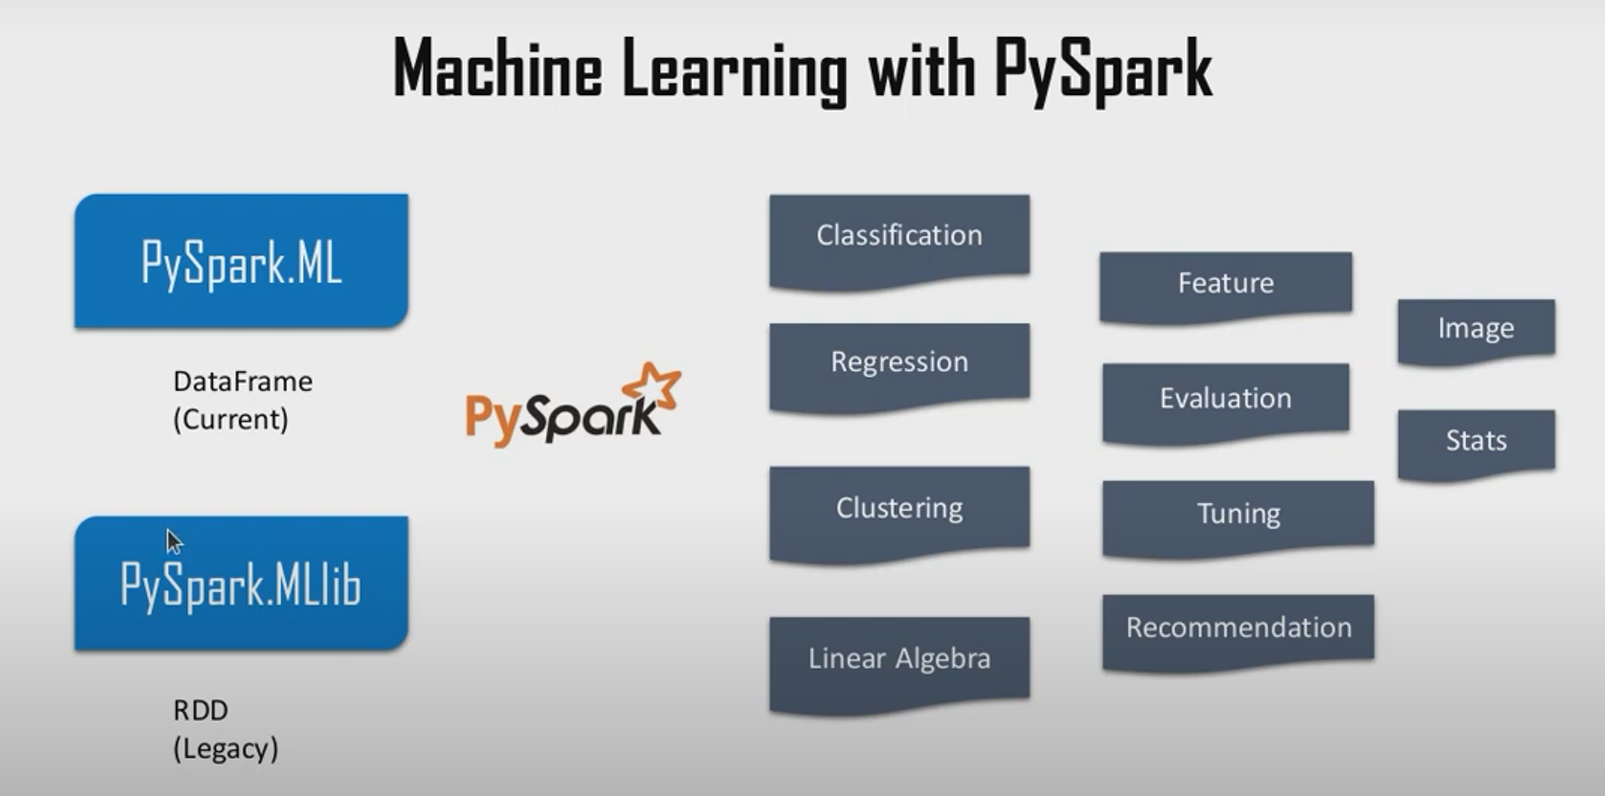

In [2]:
# Load Pyspark
from pyspark import SparkContext

In [3]:
sc = SparkContext(master = 'local[2]')

In [4]:
sc

<SparkContext master=local[2] appName=pyspark-shell>

## Basics PySpark Crash Course

In [5]:
import pyspark
# Methods / Attributes
dir(pyspark)

['Accumulator',
 'AccumulatorParam',
 'Any',
 'BarrierTaskContext',
 'BarrierTaskInfo',
 'BasicProfiler',
 'Broadcast',
 'CPickleSerializer',
 'Callable',
 'F',
 'HiveContext',
 'InheritableThread',
 'MarshalSerializer',
 'Optional',
 'Profiler',
 'RDD',
 'RDDBarrier',
 'Row',
 'SQLContext',
 'SparkConf',
 'SparkContext',
 'SparkFiles',
 'SparkJobInfo',
 'SparkStageInfo',
 'StatusTracker',
 'StorageLevel',
 'T',
 'TaskContext',
 'TypeVar',
 'Union',
 '_NoValue',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_globals',
 'accumulators',
 'broadcast',
 'cast',
 'cloudpickle',
 'conf',
 'context',
 'copy_func',
 'files',
 'find_spark_home',
 'inheritable_thread_target',
 'java_gateway',
 'join',
 'keyword_only',
 'profiler',
 'rdd',
 'rddsampler',
 'resource',
 'resultiterable',
 'serializers',
 'shuffle',
 'since',
 'sql',
 'statcounter',
 'status',
 'storagelevel',
 'taskcontext

In [6]:
from pyspark.sql import SparkSession

In [7]:
# Spark Session used for DF
spark = SparkSession.builder.appName('MLWithSpark').getOrCreate()

In [8]:
# Read CSV Without Header / Schema
df = spark.read.csv('Startups.csv')

In [9]:
# Preview Data
df.show(5)

+---------------+--------------------+--------------------+-------+---------+
|            _c0|                 _c1|                 _c2|    _c3|      _c4|
+---------------+--------------------+--------------------+-------+---------+
|R&D Expenditure|Administration Ex...|Marketing Expendi...|  State|   Profit|
|       165349.2|            136897.8|            471784.1|Florida|192261.83|
|       162597.7|           151377.59|           443898.53|Florida|191792.06|
|      153441.51|           101145.55|           407934.54|Florida|191050.39|
|      144372.41|           118671.85|           383199.62|Florida|182901.99|
+---------------+--------------------+--------------------+-------+---------+
only showing top 5 rows



In [10]:
# Read CSV With Header / Schema
df = spark.read.csv('Startups.csv',header = True)
df.show(5)

+---------------+--------------------------+---------------------+-------+---------+
|R&D Expenditure|Administration Expenditure|Marketing Expenditure|  State|   Profit|
+---------------+--------------------------+---------------------+-------+---------+
|       165349.2|                  136897.8|             471784.1|Florida|192261.83|
|       162597.7|                 151377.59|            443898.53|Florida|191792.06|
|      153441.51|                 101145.55|            407934.54|Florida|191050.39|
|      144372.41|                 118671.85|            383199.62|Florida|182901.99|
|      142107.34|                  91391.77|            366168.42|Florida|166187.94|
+---------------+--------------------------+---------------------+-------+---------+
only showing top 5 rows



In [11]:
# Get First Row
df.first()

Row(R&D Expenditure='165349.2', Administration Expenditure='136897.8', Marketing Expenditure='471784.1', State='Florida', Profit='192261.83')

In [12]:
# Get Head
df.head(5)

[Row(R&D Expenditure='165349.2', Administration Expenditure='136897.8', Marketing Expenditure='471784.1', State='Florida', Profit='192261.83'),
 Row(R&D Expenditure='162597.7', Administration Expenditure='151377.59', Marketing Expenditure='443898.53', State='Florida', Profit='191792.06'),
 Row(R&D Expenditure='153441.51', Administration Expenditure='101145.55', Marketing Expenditure='407934.54', State='Florida', Profit='191050.39'),
 Row(R&D Expenditure='144372.41', Administration Expenditure='118671.85', Marketing Expenditure='383199.62', State='Florida', Profit='182901.99'),
 Row(R&D Expenditure='142107.34', Administration Expenditure='91391.77', Marketing Expenditure='366168.42', State='Florida', Profit='166187.94')]

In [13]:
# Check For the column names
df.columns

['R&D Expenditure',
 'Administration Expenditure',
 'Marketing Expenditure',
 'State',
 'Profit']

In [14]:
# Check for Data Types
df.dtypes

[('R&D Expenditure', 'string'),
 ('Administration Expenditure', 'string'),
 ('Marketing Expenditure', 'string'),
 ('State', 'string'),
 ('Profit', 'string')]

In [15]:
# Get The Schems
df.printSchema()

root
 |-- R&D Expenditure: string (nullable = true)
 |-- Administration Expenditure: string (nullable = true)
 |-- Marketing Expenditure: string (nullable = true)
 |-- State: string (nullable = true)
 |-- Profit: string (nullable = true)



In [16]:
# Check the num of rows
df.count()

50

In [17]:
# Check for the Columns
len(df.columns)

5

In [18]:
# Get the shape (rows , cols)
print(df.count(),len(df.columns))

50 5


In [19]:
# Descriptive Summanry
df.describe().show()

+-------+-----------------+--------------------------+---------------------+-------+------------------+
|summary|  R&D Expenditure|Administration Expenditure|Marketing Expenditure|  State|            Profit|
+-------+-----------------+--------------------------+---------------------+-------+------------------+
|  count|               50|                        50|                   50|     50|                50|
|   mean|73721.61559999999|        121344.63959999995|   211025.09780000005|   null|112012.63920000002|
| stddev|45902.25648230754|        28017.802755488683|   122290.31072584528|   null|40306.180337650534|
|    min|                0|                 101145.55|                    0|Florida|         101004.64|
|    max|         94657.16|                  99814.71|             91131.24|Florida|          99937.59|
+-------+-----------------+--------------------------+---------------------+-------+------------------+



In [20]:
# Get Descriptive Summany of a column
df.describe('profit').show() # not letter case Sensetive

+-------+------------------+
|summary|            profit|
+-------+------------------+
|  count|                50|
|   mean|112012.63920000002|
| stddev|40306.180337650534|
|    min|         101004.64|
|    max|          99937.59|
+-------+------------------+



In [21]:
# Selections
df.select('profit').show()

+---------+
|   profit|
+---------+
|192261.83|
|191792.06|
|191050.39|
|182901.99|
|166187.94|
|156991.12|
|156122.51|
| 155752.6|
|152211.77|
|149759.96|
|146121.95|
| 144259.4|
|141585.52|
|134307.35|
|132602.65|
|129917.04|
|126992.93|
|125370.37|
| 124266.9|
|122776.86|
+---------+
only showing top 20 rows



In [22]:
# Select Multiple Columns
df.select('profit','state').show()

+---------+-------+
|   profit|  state|
+---------+-------+
|192261.83|Florida|
|191792.06|Florida|
|191050.39|Florida|
|182901.99|Florida|
|166187.94|Florida|
|156991.12|Florida|
|156122.51|Florida|
| 155752.6|Florida|
|152211.77|Florida|
|149759.96|Florida|
|146121.95|Florida|
| 144259.4|Florida|
|141585.52|Florida|
|134307.35|Florida|
|132602.65|Florida|
|129917.04|Florida|
|126992.93|Florida|
|125370.37|Florida|
| 124266.9|Florida|
|122776.86|Florida|
+---------+-------+
only showing top 20 rows



### Conditions & Filter
+ df.filter
+ df.where

In [23]:
# Filter : Method 1
df.filter(df['Profit']  > 2000 ).show(5)

+---------------+--------------------------+---------------------+-------+---------+
|R&D Expenditure|Administration Expenditure|Marketing Expenditure|  State|   Profit|
+---------------+--------------------------+---------------------+-------+---------+
|       165349.2|                  136897.8|             471784.1|Florida|192261.83|
|       162597.7|                 151377.59|            443898.53|Florida|191792.06|
|      153441.51|                 101145.55|            407934.54|Florida|191050.39|
|      144372.41|                 118671.85|            383199.62|Florida|182901.99|
|      142107.34|                  91391.77|            366168.42|Florida|166187.94|
+---------------+--------------------------+---------------------+-------+---------+
only showing top 5 rows



In [24]:
# Where : Method 1
df.where(df['Profit']  > 2000 ).show(5)

+---------------+--------------------------+---------------------+-------+---------+
|R&D Expenditure|Administration Expenditure|Marketing Expenditure|  State|   Profit|
+---------------+--------------------------+---------------------+-------+---------+
|       165349.2|                  136897.8|             471784.1|Florida|192261.83|
|       162597.7|                 151377.59|            443898.53|Florida|191792.06|
|      153441.51|                 101145.55|            407934.54|Florida|191050.39|
|      144372.41|                 118671.85|            383199.62|Florida|182901.99|
|      142107.34|                  91391.77|            366168.42|Florida|166187.94|
+---------------+--------------------------+---------------------+-------+---------+
only showing top 5 rows



In [25]:
# Where : Method 1
df.where(df['Profit']  > 2000 ).select('state').show(5)

+-------+
|  state|
+-------+
|Florida|
|Florida|
|Florida|
|Florida|
|Florida|
+-------+
only showing top 5 rows



In [26]:
# Add a Column
df.withColumn('new_proft',df['profit'] +5).show(5)

+---------------+--------------------------+---------------------+-------+---------+---------+
|R&D Expenditure|Administration Expenditure|Marketing Expenditure|  State|   Profit|new_proft|
+---------------+--------------------------+---------------------+-------+---------+---------+
|       165349.2|                  136897.8|             471784.1|Florida|192261.83|192266.83|
|       162597.7|                 151377.59|            443898.53|Florida|191792.06|191797.06|
|      153441.51|                 101145.55|            407934.54|Florida|191050.39|191055.39|
|      144372.41|                 118671.85|            383199.62|Florida|182901.99|182906.99|
|      142107.34|                  91391.77|            366168.42|Florida|166187.94|166192.94|
+---------------+--------------------------+---------------------+-------+---------+---------+
only showing top 5 rows



In [27]:
# Drop a Column
df.drop('new_proft').show()

+---------------+--------------------------+---------------------+-------+---------+
|R&D Expenditure|Administration Expenditure|Marketing Expenditure|  State|   Profit|
+---------------+--------------------------+---------------------+-------+---------+
|       165349.2|                  136897.8|             471784.1|Florida|192261.83|
|       162597.7|                 151377.59|            443898.53|Florida|191792.06|
|      153441.51|                 101145.55|            407934.54|Florida|191050.39|
|      144372.41|                 118671.85|            383199.62|Florida|182901.99|
|      142107.34|                  91391.77|            366168.42|Florida|166187.94|
|       131876.9|                  99814.71|            362861.36|Florida|156991.12|
|      134615.46|                 147198.87|            127716.82|Florida|156122.51|
|      130298.13|                 145530.06|            323876.68|Florida| 155752.6|
|      120542.52|                 148718.95|            311613.29

In [32]:
# GroupBy
df.groupby('State').count().show()

+-------+-----+
|  State|count|
+-------+-----+
|Florida|   50|
+-------+-----+



In [34]:
# Unique Values
df.select('state').distinct().show()

+-------+
|  state|
+-------+
|Florida|
+-------+



In [36]:
# Like SQL
df.selectExpr('count(distinct(state))').show()

+---------------------+
|count(DISTINCT state)|
+---------------------+
|                    1|
+---------------------+



# Save Dataset
+ csv
+ parquet
+ etc

In [40]:
df.write.format('csv').option('header','true').save('new_data.csv')

Py4JJavaError: An error occurred while calling o120.save.
: java.lang.RuntimeException: java.io.FileNotFoundException: java.io.FileNotFoundException: HADOOP_HOME and hadoop.home.dir are unset. -see https://wiki.apache.org/hadoop/WindowsProblems
	at org.apache.hadoop.util.Shell.getWinUtilsPath(Shell.java:735)
	at org.apache.hadoop.util.Shell.getSetPermissionCommand(Shell.java:270)
	at org.apache.hadoop.util.Shell.getSetPermissionCommand(Shell.java:286)
	at org.apache.hadoop.fs.RawLocalFileSystem.setPermission(RawLocalFileSystem.java:978)
	at org.apache.hadoop.fs.RawLocalFileSystem.mkOneDirWithMode(RawLocalFileSystem.java:660)
	at org.apache.hadoop.fs.RawLocalFileSystem.mkdirsWithOptionalPermission(RawLocalFileSystem.java:700)
	at org.apache.hadoop.fs.RawLocalFileSystem.mkdirs(RawLocalFileSystem.java:672)
	at org.apache.hadoop.fs.RawLocalFileSystem.mkdirsWithOptionalPermission(RawLocalFileSystem.java:699)
	at org.apache.hadoop.fs.RawLocalFileSystem.mkdirs(RawLocalFileSystem.java:672)
	at org.apache.hadoop.fs.RawLocalFileSystem.mkdirsWithOptionalPermission(RawLocalFileSystem.java:699)
	at org.apache.hadoop.fs.RawLocalFileSystem.mkdirs(RawLocalFileSystem.java:672)
	at org.apache.hadoop.fs.ChecksumFileSystem.mkdirs(ChecksumFileSystem.java:788)
	at org.apache.hadoop.mapreduce.lib.output.FileOutputCommitter.setupJob(FileOutputCommitter.java:356)
	at org.apache.spark.internal.io.HadoopMapReduceCommitProtocol.setupJob(HadoopMapReduceCommitProtocol.scala:188)
	at org.apache.spark.sql.execution.datasources.FileFormatWriter$.write(FileFormatWriter.scala:219)
	at org.apache.spark.sql.execution.datasources.InsertIntoHadoopFsRelationCommand.run(InsertIntoHadoopFsRelationCommand.scala:186)
	at org.apache.spark.sql.execution.command.DataWritingCommandExec.sideEffectResult$lzycompute(commands.scala:113)
	at org.apache.spark.sql.execution.command.DataWritingCommandExec.sideEffectResult(commands.scala:111)
	at org.apache.spark.sql.execution.command.DataWritingCommandExec.executeCollect(commands.scala:125)
	at org.apache.spark.sql.execution.QueryExecution$$anonfun$eagerlyExecuteCommands$1.$anonfun$applyOrElse$1(QueryExecution.scala:98)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$6(SQLExecution.scala:109)
	at org.apache.spark.sql.execution.SQLExecution$.withSQLConfPropagated(SQLExecution.scala:169)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$1(SQLExecution.scala:95)
	at org.apache.spark.sql.SparkSession.withActive(SparkSession.scala:779)
	at org.apache.spark.sql.execution.SQLExecution$.withNewExecutionId(SQLExecution.scala:64)
	at org.apache.spark.sql.execution.QueryExecution$$anonfun$eagerlyExecuteCommands$1.applyOrElse(QueryExecution.scala:98)
	at org.apache.spark.sql.execution.QueryExecution$$anonfun$eagerlyExecuteCommands$1.applyOrElse(QueryExecution.scala:94)
	at org.apache.spark.sql.catalyst.trees.TreeNode.$anonfun$transformDownWithPruning$1(TreeNode.scala:584)
	at org.apache.spark.sql.catalyst.trees.CurrentOrigin$.withOrigin(TreeNode.scala:176)
	at org.apache.spark.sql.catalyst.trees.TreeNode.transformDownWithPruning(TreeNode.scala:584)
	at org.apache.spark.sql.catalyst.plans.logical.LogicalPlan.org$apache$spark$sql$catalyst$plans$logical$AnalysisHelper$$super$transformDownWithPruning(LogicalPlan.scala:30)
	at org.apache.spark.sql.catalyst.plans.logical.AnalysisHelper.transformDownWithPruning(AnalysisHelper.scala:267)
	at org.apache.spark.sql.catalyst.plans.logical.AnalysisHelper.transformDownWithPruning$(AnalysisHelper.scala:263)
	at org.apache.spark.sql.catalyst.plans.logical.LogicalPlan.transformDownWithPruning(LogicalPlan.scala:30)
	at org.apache.spark.sql.catalyst.plans.logical.LogicalPlan.transformDownWithPruning(LogicalPlan.scala:30)
	at org.apache.spark.sql.catalyst.trees.TreeNode.transformDown(TreeNode.scala:560)
	at org.apache.spark.sql.execution.QueryExecution.eagerlyExecuteCommands(QueryExecution.scala:94)
	at org.apache.spark.sql.execution.QueryExecution.commandExecuted$lzycompute(QueryExecution.scala:81)
	at org.apache.spark.sql.execution.QueryExecution.commandExecuted(QueryExecution.scala:79)
	at org.apache.spark.sql.execution.QueryExecution.assertCommandExecuted(QueryExecution.scala:116)
	at org.apache.spark.sql.DataFrameWriter.runCommand(DataFrameWriter.scala:860)
	at org.apache.spark.sql.DataFrameWriter.saveToV1Source(DataFrameWriter.scala:390)
	at org.apache.spark.sql.DataFrameWriter.saveInternal(DataFrameWriter.scala:363)
	at org.apache.spark.sql.DataFrameWriter.save(DataFrameWriter.scala:239)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:77)
	at java.base/jdk.internal.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.base/java.lang.reflect.Method.invoke(Method.java:568)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.base/java.lang.Thread.run(Thread.java:833)
Caused by: java.io.FileNotFoundException: java.io.FileNotFoundException: HADOOP_HOME and hadoop.home.dir are unset. -see https://wiki.apache.org/hadoop/WindowsProblems
	at org.apache.hadoop.util.Shell.fileNotFoundException(Shell.java:547)
	at org.apache.hadoop.util.Shell.getHadoopHomeDir(Shell.java:568)
	at org.apache.hadoop.util.Shell.getQualifiedBin(Shell.java:591)
	at org.apache.hadoop.util.Shell.<clinit>(Shell.java:688)
	at org.apache.hadoop.util.StringUtils.<clinit>(StringUtils.java:79)
	at org.apache.hadoop.conf.Configuration.getTimeDurationHelper(Configuration.java:1907)
	at org.apache.hadoop.conf.Configuration.getTimeDuration(Configuration.java:1867)
	at org.apache.hadoop.conf.Configuration.getTimeDuration(Configuration.java:1840)
	at org.apache.hadoop.util.ShutdownHookManager.getShutdownTimeout(ShutdownHookManager.java:183)
	at org.apache.hadoop.util.ShutdownHookManager$HookEntry.<init>(ShutdownHookManager.java:207)
	at org.apache.hadoop.util.ShutdownHookManager.addShutdownHook(ShutdownHookManager.java:304)
	at org.apache.spark.util.SparkShutdownHookManager.install(ShutdownHookManager.scala:181)
	at org.apache.spark.util.ShutdownHookManager$.shutdownHooks$lzycompute(ShutdownHookManager.scala:50)
	at org.apache.spark.util.ShutdownHookManager$.shutdownHooks(ShutdownHookManager.scala:48)
	at org.apache.spark.util.ShutdownHookManager$.addShutdownHook(ShutdownHookManager.scala:153)
	at org.apache.spark.util.ShutdownHookManager$.<init>(ShutdownHookManager.scala:58)
	at org.apache.spark.util.ShutdownHookManager$.<clinit>(ShutdownHookManager.scala)
	at org.apache.spark.util.Utils$.createTempDir(Utils.scala:343)
	at org.apache.spark.deploy.SparkSubmit.prepareSubmitEnvironment(SparkSubmit.scala:344)
	at org.apache.spark.deploy.SparkSubmit.org$apache$spark$deploy$SparkSubmit$$runMain(SparkSubmit.scala:901)
	at org.apache.spark.deploy.SparkSubmit.doRunMain$1(SparkSubmit.scala:180)
	at org.apache.spark.deploy.SparkSubmit.submit(SparkSubmit.scala:203)
	at org.apache.spark.deploy.SparkSubmit.doSubmit(SparkSubmit.scala:90)
	at org.apache.spark.deploy.SparkSubmit$$anon$2.doSubmit(SparkSubmit.scala:1046)
	at org.apache.spark.deploy.SparkSubmit$.main(SparkSubmit.scala:1055)
	at org.apache.spark.deploy.SparkSubmit.main(SparkSubmit.scala)
Caused by: java.io.FileNotFoundException: HADOOP_HOME and hadoop.home.dir are unset.
	at org.apache.hadoop.util.Shell.checkHadoopHomeInner(Shell.java:467)
	at org.apache.hadoop.util.Shell.checkHadoopHome(Shell.java:438)
	at org.apache.hadoop.util.Shell.<clinit>(Shell.java:515)
	... 22 more


### Working with SQL and Making SQL

In [41]:
from pyspark.sql import SQLContext

In [42]:
sqlContext = SQLContext(sc)

d:\Src\Anaconda\lib\site-packages\pyspark\sql\context.py:112: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


In [43]:
df.registerTempTable('HCVTable')

d:\Src\Anaconda\lib\site-packages\pyspark\sql\dataframe.py:229: FutureWarning: Deprecated in 2.0, use createOrReplaceTempView instead.
  warnings.warn("Deprecated in 2.0, use createOrReplaceTempView instead.", FutureWarning)


In [44]:
# Make Queries
sqlContext.sql('SELECT * FROM HCVTable').show()

+---------------+--------------------------+---------------------+-------+---------+
|R&D Expenditure|Administration Expenditure|Marketing Expenditure|  State|   Profit|
+---------------+--------------------------+---------------------+-------+---------+
|       165349.2|                  136897.8|             471784.1|Florida|192261.83|
|       162597.7|                 151377.59|            443898.53|Florida|191792.06|
|      153441.51|                 101145.55|            407934.54|Florida|191050.39|
|      144372.41|                 118671.85|            383199.62|Florida|182901.99|
|      142107.34|                  91391.77|            366168.42|Florida|166187.94|
|       131876.9|                  99814.71|            362861.36|Florida|156991.12|
|      134615.46|                 147198.87|            127716.82|Florida|156122.51|
|      130298.13|                 145530.06|            323876.68|Florida| 155752.6|
|      120542.52|                 148718.95|            311613.29